#***K-Means***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
df.head(6)

In [ ]:
#Select the annual income and the spending score columns
X = df.iloc[:, [3,4]].values


In [ ]:
# KMeans class from the sklearn library.
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# print(wcss)
plt.plot(range(1,11),wcss)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)

In [ ]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

In [ ]:
df['cluster'] = y_kmeans
df.head(5)

In [ ]:
#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

#Plot the centroid. This time we're going to use the cluster centres
#attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# **Hirarchical clustering**

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


In [ ]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

#Plot the centroid. This time we're going to use the cluster centres
#attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# **Apriori Algo**

In [ ]:
!pip install apyori

In [ ]:
import pandas as pd
import numpy as np
from apyori import apriori

In [ ]:
df = pd.read_csv('/content/Market_Basket_Optimisation.csv')
df.head(5)

In [ ]:
df.fillna(0,inplace=True)
columns_except_last = df.columns[:-1]
df = df[columns_except_last]
df

In [ ]:
transactions = []

for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,19) if str(df.values[i,j])!='0'])

In [ ]:
rules = apriori(transactions, min_support=0.003, min_confidance=0.2, min_lift=3, min_length=2)
Results = list(rules)
Results

In [ ]:
for item in Results:
  pair=item[0]
  items = [x for x in pair]

  print('Rule:' + items[0]+ ' -> ' + items[1])

  print('Support: '+ str(item[1]))
  print('Confidence: '+ str(item[2][0][2]))
  print('Lift: '+ str(item[2][0][3]))
  print('========================================')

# **Rainforcemrnt Learning**

In [ ]:
import numpy as np

state_to_index = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4}
indes_to_state = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E'}

reward_matrix = np.array([
    [0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 1, 0]
    ])

reward_matrix


In [ ]:
gamma = 0.95 # Discount factor
alpha = 0.1  # Learning rate

In [ ]:
state_size = len(state_to_index)
action_size = len(indes_to_state)
Q_matrix = np.zeros([state_size, action_size])
Q_matrix

In [ ]:
def q_learning_updates(s, a, reward, s2, Q_matrix):
  Q_matrix[s, a] = (1 - alpha) * Q_matrix[s, a] + alpha*(reward + gamma * np.max(Q_matrix[s2, :]))
  s=s2
  return s, Q_matrix


def get_action(state, Q_matrix, epsilon=0.1):
  if np.random.random() < epsilon:
    return np.random.choice(action_size)
  else:
    return np.argmax(Q_matrix[state, :])



def find_optimal_route(initial_state, goal_state, Q_matrix, episodes=1000):
    for _ in range(episodes):
        state = initial_state
        while state != goal_state:
            action = get_action(state, Q_matrix)
            next_state = action
            reward = reward_matrix[state, action]
            state, Q_matrix = q_learning_updates(state, action, reward, next_state, Q_matrix)

    return Q_matrix


In [ ]:
initial_state = state_to_index['A']
goal_state = state_to_index['E']

Q_matrix = find_optimal_route(initial_state, goal_state, Q_matrix)
print(Q_matrix)

In [ ]:
optimal_actions = [np.argmax (Q_matrix[state, ]) for state in range(state_size)]
optimal_actions = [indes_to_state[action] for action in optimal_actions]
print("Optimal Actions for each state:", optimal_actions)

In [ ]:
for state in state_to_index:
  for action in state_to_index:
    state_idx= state_to_index[state]
    action_idx= state_to_index [action]
    immediate_reward = reward_matrix[state_idx, action_idx]
    print (f"Immediate Reward for moving from state {state} to state {action}: {immediate_reward}")

In [ ]:
action_sequence = ['A', 'B', 'C', 'D', 'E']
discounted_reward = 0
current_gamma = 1
for i in range(len(action_sequence) - 1):
  state = state_to_index[action_sequence[i]]
  next_state = state_to_index [action_sequence[i+1]]
  reward = reward_matrix[state, next_state]
  discounted_reward += current_gamma * reward
  current_gamma *= gamma
print("Discounted Reward for the action sequence:", discounted_reward)

# **Time serese Analyis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#Load the Air Passengers dataset
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)

series

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-07,622
1960-08,606
1960-09,508


In [ ]:
def check_stationary (series):
  result = adfuller (series)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


check_stationary (series)

ADF Statistic: 0.858591
p-value: 0.992525
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
def make_stationary (series):
  stationary_series = series.diff().dropna()
  return stationary_series

stationary_series = make_stationary (series)

In [ ]:
check_stationary (stationary_series)

ADF Statistic: -2.794007
p-value: 0.059135
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


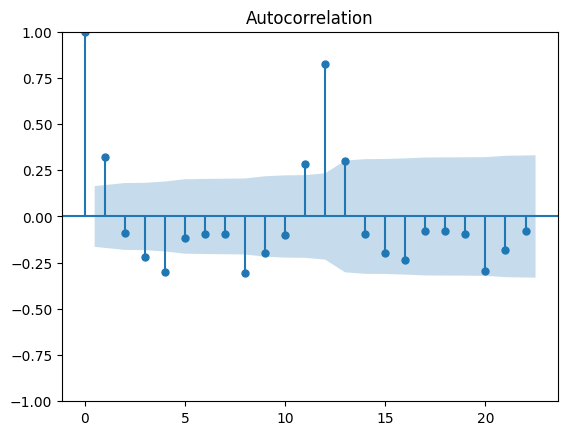

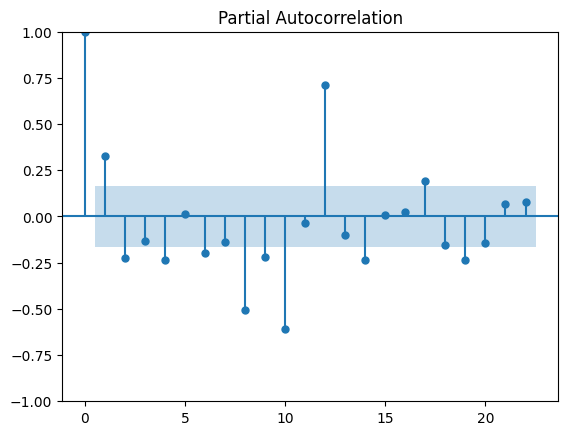

In [ ]:
plot_acf(stationary_series)
plot_pacf(stationary_series)
plt.show()

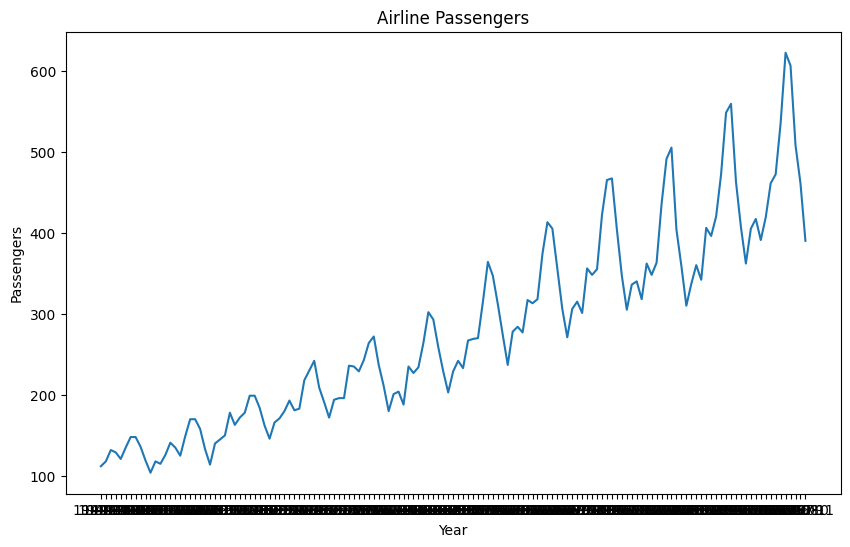

In [ ]:
#Plot the original time series:
plt.figure(figsize=(10, 6))
plt.plot(series.index, series["Passengers"])
plt.title("Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

In [ ]:
# !pip install pmdarima
import pmdarima as pm
auto_model = pm.auto_arima (series, seasonal=False, stepwise=True, suppress_warnings=True, trace=True, error_action='ignore', information_criterion='aic')
print("Optimal (p, d, q) values:", auto_model.order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1330.794, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1405.001, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1390.781, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1385.371, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1403.482, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1381.655, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.59 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 5.334 seco

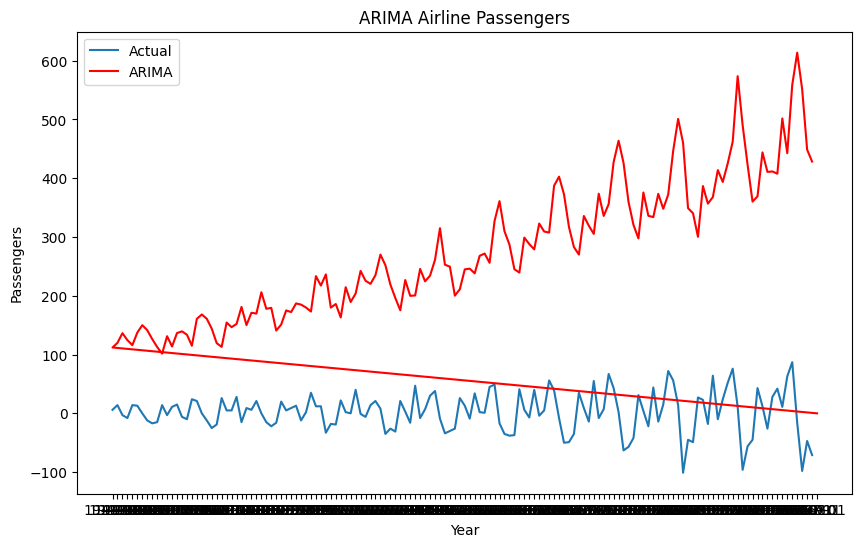

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA (series, order=(4, 1, 3))
model_fit = model.fit()
# Plot the stationary series and fitted values
plt.figure(figsize=(10, 6))
plt.plot(stationary_series, label="Actual")
plt.plot(model_fit.fittedvalues, color='red', label="ARIMA")
plt.title("ARIMA Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [ ]:
forecast = model_fit.forecast(steps=10)
print("Forecasted values: \n", forecast)

Forecasted values: 
 1960-12-01    388.846631
Freq: MS, dtype: float64


# **Boosting**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
cv_scores = cross_val_score (clf, X_train, y_train, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())



Cross-validation scores:  [0.95238095 0.9047619  0.9047619  0.95238095 0.9047619 ]
Mean cross-validation score: 0.9238095238095239


In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score (y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 1.0


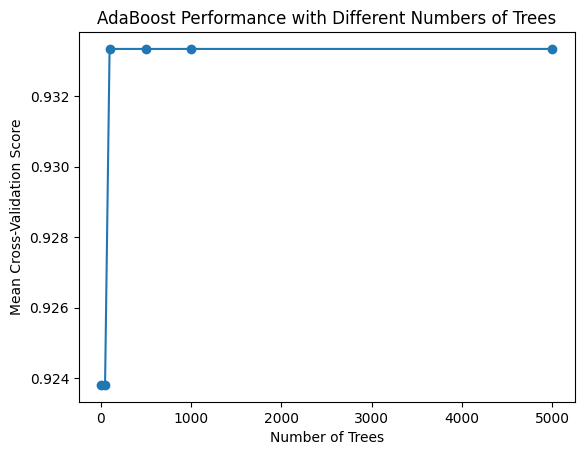

In [ ]:

n_estimators_values = [10, 50, 100, 500, 1000, 5000]
CV_scores_mean = []

for n_estimators in n_estimators_values:
    clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=1, random_state=42)
    CV_scores = cross_val_score(clf, X_train, y_train, cv=5)
    CV_scores_mean.append(CV_scores.mean())

plt.plot(n_estimators_values, CV_scores_mean, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Cross-Validation Score')
plt.title('AdaBoost Performance with Different Numbers of Trees')
plt.show()

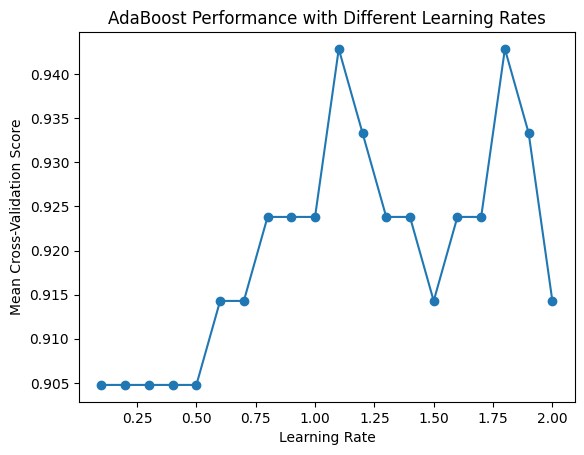

In [ ]:
learning_rates = np.linspace(0.1, 2, 20)
CV_scores_mean = []

for learning_rate in learning_rates:
    clf = AdaBoostClassifier(n_estimators=50, learning_rate=learning_rate, random_state=42)
    CV_scores = cross_val_score(clf, X_train, y_train, cv=5)
    CV_scores_mean.append(CV_scores.mean())

plt.plot(learning_rates, CV_scores_mean, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Cross-Validation Score')
plt.title('AdaBoost Performance with Different Learning Rates')
plt.show()

# **Deep Learning**

# Loading dataset into keras pttoarch and train test split

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/tts.csv')

In [ ]:
df

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [ ]:
X = df.iloc[:,[0]]
y = df.iloc[:,[1]]

,Transported
0,False
1,False
2,False
3,False
4,False
...,...
4272,False
4273,False
4274,False
4275,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)

In [ ]:
print('X_train: \n',X_train)
print('X_test: \n',X_test)
print('y_train: \n',y_train)
print('y_test: \n',y_test)

X_train: 
      PassengerId
1629     3510_01
689      1411_01
2013     4325_01
528      1118_04
2336     5081_01
...          ...
4219     9155_01
2193     4745_01
3473     7562_01
343      0735_01
899      1862_02

[2865 rows x 1 columns]
X_test: 
      PassengerId
3610     7874_02
1468     3150_01
2408     5267_02
1660     3587_02
1114     2354_01
...          ...
3716     8104_01
3684     8011_01
560      1159_01
2620     5749_01
2042     4412_01

[1412 rows x 1 columns]
y_train: 
       Transported
1629        False
689         False
2013        False
528         False
2336        False
...           ...
4219        False
2193        False
3473        False
343         False
899         False

[2865 rows x 1 columns]
y_test: 
       Transported
3610        False
1468        False
2408        False
1660        False
1114        False
...           ...
3716        False
3684        False
560         False
2620        False
2042        False

[1412 rows x 1 columns]


# Creating function to compute verious losses

In [ ]:
import numpy as np
import pandas as pd


from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names']+['target'])
data['target'] = data['target'].astype(int)

def mean_square_error(y_true, y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absulute_error(y_true, y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_square_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

y_true = data['target'].values


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y_pred = np.random.rand(len(y_true))

print('mean_square_error: ', mean_square_error(y_true, y_pred))
print('mean_absulute_error: ', mean_absulute_error(y_true, y_pred))
print('root_mean_square_error: ', root_mean_square_error(y_true, y_pred))

mean_square_error:  1.0427472838286793
mean_absulute_error:  0.855241018679359
root_mean_square_error:  1.0211499810648186


In [1]:
import numpy as np
import pandas as pd

In [2]:
def categorical_crossentropy(y_true,y_pred):
    epsilon=1e-15
    y_pred=np.clip(y_pred, epsilon, 1-epsilon)
    return np.mean(-np.sum(y_true*np.log(y_pred), axis=1))

In [3]:
def binary_crossentropy(y_true,y_pred):
    epsilon=1e-15
    y_pred=np.clip(y_pred, epsilon, 1-epsilon)
    return np.mean(-np.sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred), axis=1))


In [7]:
data=pd.read_csv('C:/Users/kanaka/Downloads/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
data['Species']=data['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])
x=data.drop('Species', axis=1).values
y=data['Species'].values

In [11]:
y_pred=np.random.rand(len(y), 1)
binary_crossentropy_loss=binary_crossentropy(y.reshape(-1,1), y_pred)
print(f'Binary Crossentropy Loss: {binary_crossentropy_loss:.4f}')

Binary Crossentropy Loss: 0.8557


In [12]:
y=pd.get_dummies(data['Species'].values)
y_pred=np.random.rand(len(y),3)
categorical_crossentropy_loss=categorical_crossentropy(y,y_pred)
print(f'Categorical Crossentropy Loss: {categorical_crossentropy_loss:.4f}')

Categorical Crossentropy Loss: 0.9866


# feeding data to pretrain network and meking prediction